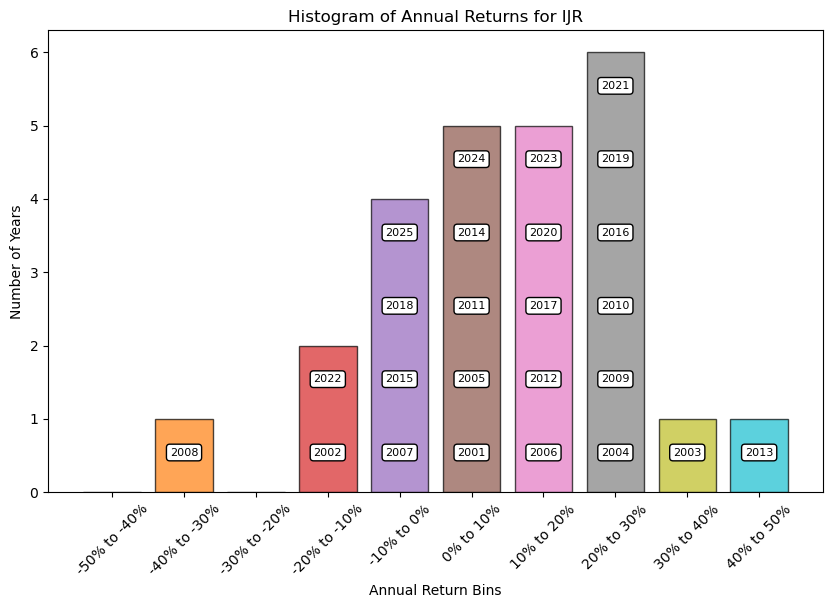

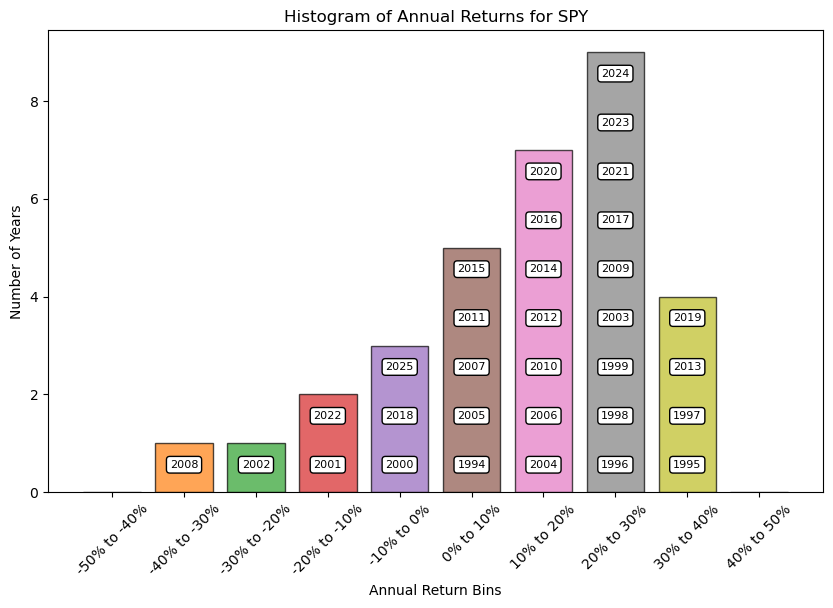

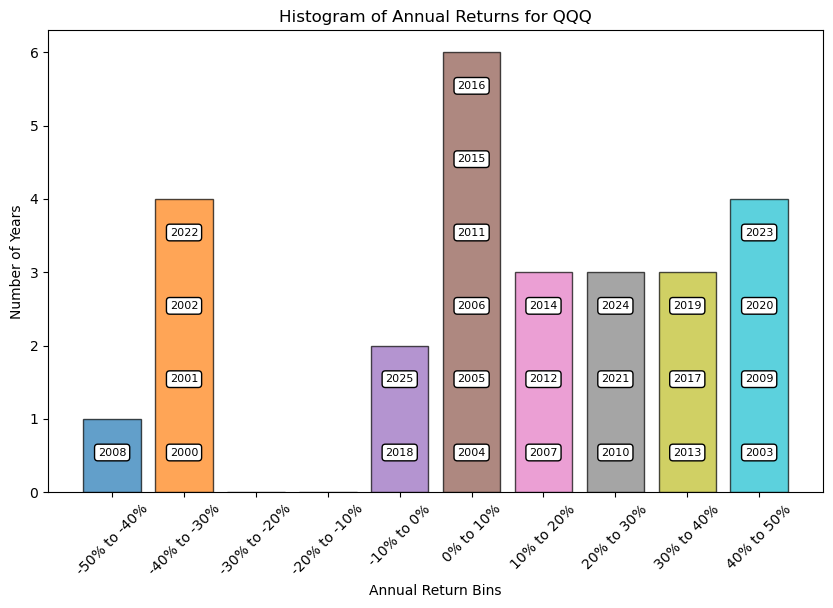

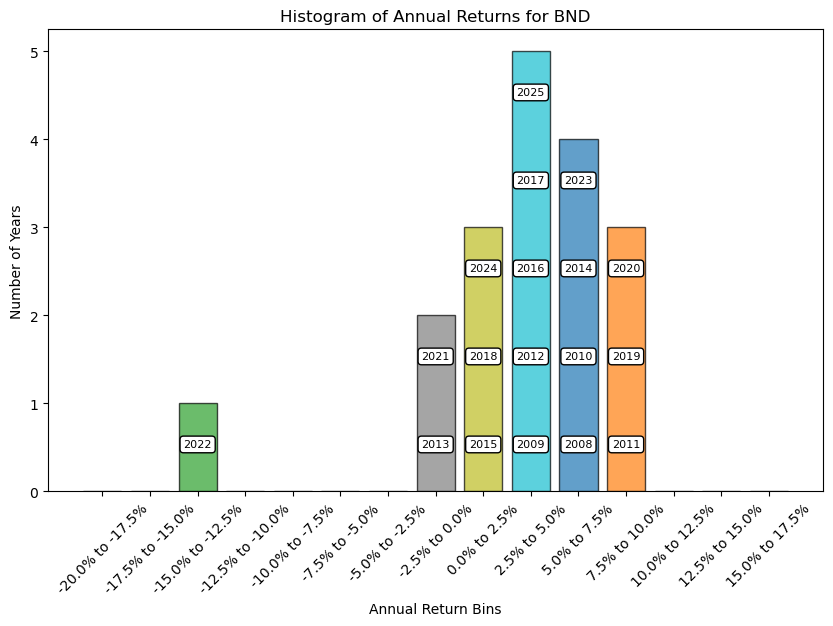

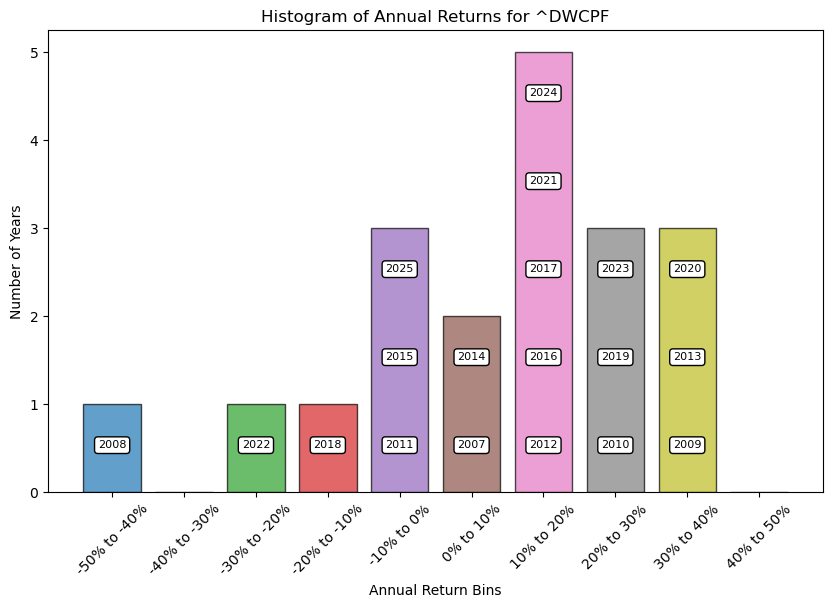

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fetch_annual_returns(ticker):
    asset = yf.Ticker(ticker)
    hist = asset.history(period="max", interval="1mo")
    hist['Year'] = hist.index.year
    yearly_prices = hist['Close'].resample('Y').last()
    annual_returns = yearly_prices.pct_change().dropna() * 100  # Convert to percentage
    annual_returns.index = annual_returns.index.year  # Convert datetime index to just years
    return annual_returns

def plot_histogram(ticker, annual_returns, bins):
    plt.figure(figsize=(10, 6))
    
    counts, edges = np.histogram(annual_returns, bins=bins)
    stacked_years = {bin_range: [] for bin_range in bins[:-1]}
    
    for year, ret in annual_returns.items():
        bin_index = np.digitize(ret, bins) - 1
        bin_index = max(0, min(bin_index, len(bins) - 2))  # Ensure valid index
        stacked_years[bins[bin_index]].append(int(year))  # Ensure year is an integer
    
    for i, bin_start in enumerate(bins[:-1]):
        bin_label = f"{bin_start}% to {bins[i+1]}%"
        years = stacked_years[bin_start]
        bars = plt.bar(bin_label, len(years), alpha=0.7, edgecolor='black')  # Add borders
        for j, year in enumerate(years):
            plt.text(bin_label, j + 0.5, str(year), ha='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
    plt.xlabel("Annual Return Bins")
    plt.ylabel("Number of Years")
    plt.title(f"Histogram of Annual Returns for {ticker}")
    plt.xticks(rotation=45)
    
    # Save the plot as a PNG file
    plt.savefig(f"{ticker}_histogram.png", dpi=300, bbox_inches='tight')
    plt.show()

# Get data for each ticker with range parameters
ticker_bins = {
    "IJR": np.arange(-50, 60, 10),
    "SPY": np.arange(-50, 60, 10),
    "QQQ": np.arange(-50, 60, 10),
    "BND": np.arange(-20, 20, 2.5),  # Narrower bins for BND
    "^DWCPF": np.arange(-50, 60, 10)
}

for ticker, bins in ticker_bins.items():
    annual_returns = fetch_annual_returns(ticker)
    plot_histogram(ticker, annual_returns, bins)


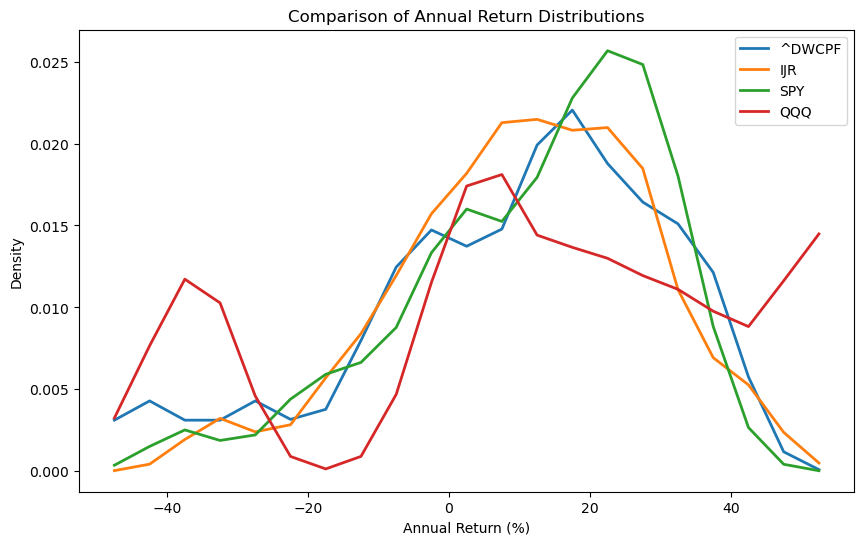

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def fetch_annual_returns(ticker):
    asset = yf.Ticker(ticker)
    hist = asset.history(period="max", interval="1mo")
    hist['Year'] = hist.index.year
    yearly_prices = hist['Close'].resample('Y').last()
    annual_returns = yearly_prices.pct_change().dropna() * 100  # Convert to percentage
    return annual_returns

# Tickers
tickers = ["^DWCPF", "IJR", "SPY", "QQQ"]
bins = np.arange(-50, 60, 5)  # Common bins for all

plt.figure(figsize=(10, 6))

for ticker in tickers:
    annual_returns = fetch_annual_returns(ticker)
    counts, edges = np.histogram(annual_returns, bins=bins, density=True)  # Normalize for comparison
    centers = (edges[:-1] + edges[1:]) / 2  # Bin centers
    smoothed_counts = gaussian_filter1d(counts, sigma=1)  # Smooth the line
    plt.plot(centers, smoothed_counts, linestyle='-', linewidth=2, label=ticker)  # No markers

plt.xlabel("Annual Return (%)")
plt.ylabel("Density")
plt.title("Comparison of Annual Return Distributions")
plt.legend()
plt.savefig("comparison_histograms.png", dpi=300, bbox_inches='tight')
plt.show()
